[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/carlos-adir/UnB-Courses/blob/main/vibracoes/forcamento-harmonico.ipynb)

In [1]:
import numpy as np
import sympy as sp
from scipy.integrate import odeint
try:
    from matplolib import pyplot as plt
except ModuleNotFoundError:
    import os
    os.system("pip install matplotlib")
    from matplotlib import pyplot as plt

## O problema

Este problema é a continuação da análise de um problema de dinâmica de corpo rigido

* De massa $m$ que é ligada a
* uma mola de constante $k$ 
* e a um amortecedor $c$

A equação é então regida por

$$
m\ddot{x} + c\dot{x} + kx = f
$$

Em [outro notebook](https://github.com/carlos-adir/UnB-Courses/blob/main/vibracoes/sistema-massa-mola.ipynb) já tratamos o caso de oscilação livre, quando o termo $f$ é nulo. Neste, iremos dizer que o forçamento $f$ é um forçamento harmônico

$$
f = f_0 \cdot \cos \left(\omega t - \phi\right)
$$

De modo similar, teremos as condições iniciais

* Posição inicial $x(0) = x_0$
* Velocidade inicial $\dot{x}(0) = v_0$

## Solução analítica

Temos a equação dada por

$$
m \cdot \ddot{x} + c \cdot \dot{x} + k \cdot x = f_0 \cdot \cos \left(\omega t - \phi\right)
$$

Em que às vezes usaremos os valores equivalentes

$$
\omega_{n} = \sqrt{\dfrac{k}{m}} \ \ \ \ \ \ \ \ \ 2\xi = \dfrac{c}{\sqrt{km}} \ \ \ \ \ \ \ \ \ \mu = \sqrt{1-\xi^2}
$$

Ou de forma complexa

$$
m\ddot{x} + c \dot{x} + k \cdot x = f_{0}\exp i \left(\omega t + \phi\right)
$$

A solução da EDO pode ser feita utilizando a transformada de Laplace dada por

$$
L\left(f\right) = \int_{0}^{\infty} f(t) \cdot \exp\left(-st\right) dt
$$

$$
ms^2 X + cs X + kX - \left[mv_0 + (ms+c)x_0\right]= f_0 \cdot \dfrac{\exp \left(i\phi\right)}{s - i\omega}
$$

Isolando $X$ obtemos

$$
X = \dfrac{1}{ms^2+cs+k} \cdot \left[mv_0 + (ms+c)x_0 + \dfrac{f_0 \exp \left(i\phi\right)}{s-i\omega}\right]
$$


Assumindo que $m$, $c$ e $k$ satisfazem um sistema subamortecido ($0 \le \xi < 1$) e pegando a tabela de transformadas, teremos

$$
L^{-1}\left(\dfrac{s+a}{(s+a)^2+b^2}\right) = \exp \left(-a t\right) \cos \left(bt\right)
$$
$$
L^{-1}\left(\dfrac{b}{(s+a)^2+b^2}\right) = \exp \left(-a t\right) \sin \left(bt\right)
$$
$$
L^{-1}\left(\dfrac{1}{ms^2 + cs + k}\right) = \dfrac{1}{\mu \sqrt{km}}\exp \left(-\xi \omega_{n} t\right) \sin \left(\mu \omega_{n} t\right)
$$
$$
L^{-1}\left(\dfrac{ms}{ms^2 + cs + k}\right) = \exp \left(-\xi \omega_{n} t\right) \left[ \cos \left(\mu \omega_{n} t\right) - \dfrac{\xi}{\mu} \sin \left(\mu \omega_{n} t\right)\right]
$$
$$
\dfrac{1}{s-i\omega}\cdot \dfrac{1}{ms^2 + cs + k} = \dfrac{1}{k-m\omega^2 + ic\omega} \left[\dfrac{1}{s-i\omega}- \dfrac{ms+c + im\omega}{ms^2 + cs + k}\right]
$$


Então fazendo a transformada inversa de $X$ teremos

$$
x_{homo}(t) =  \exp\left(-\xi \omega_n t\right) \left[ x_0 \cos \left(\mu \omega_{n} t\right) + \left(\dfrac{1 }{\mu \omega_{n}} v_0+ \dfrac{\xi}{\mu}x_0 \right) \sin\left(\mu \omega_{n} t\right)  \right]
$$
$$
x_{forc}(t) = \dfrac{-f_0 \exp\left(i\phi\right)}{k-m\omega^2 + ic\omega}  \exp \left(-\xi \omega_{n} t\right) \left[ \cos \left(\mu \omega_{n} t\right) + \left( \dfrac{i\omega}{\mu \omega_{n}}  + \dfrac{\xi}{\mu} \right) \sin \left(\mu \omega_{n} t\right) \right]
$$
$$
x_{infi}(t) = \dfrac{f_0 \exp\left(i\phi\right)}{k-m\omega^2 + ic\omega} \exp \left(i \omega t\right) 
$$

$$
\boxed{ x(t) = x_{homo}(t) + x_{forc}(t) + x_{infi}(t)}
$$



In [2]:
# The system
k = 1
c = 0.5
m = 1
wn = np.sqrt(k/m)
xi = c/(2*np.sqrt(k*m))
mu = np.sqrt(1-xi**2)
print("Mass-spring-damper parameters")
print("     m = %.3f" % m)
print("     c = %.3f" % c)
print("     k = %.3f" % k)
print("    wn = %.3f" % wn)
print("    xi = %.3f" % xi)
print("    mu = %.3f" % mu)

Mass-spring-damper parameters
     m = 1.000
     c = 0.500
     k = 1.000
    wn = 1.000
    xi = 0.250
    mu = 0.968


In [3]:
# The initial conditions
x0 = 1
v0 = 1
A = x0
B = (xi/mu)*x0 + v0/(mu*wn)
the = np.arctan2(A, B)
print("Initial conditions")
print("    x0 = %.3f" % x0)
print("    v0 = %.3f" % v0)
print("     A = %.3f" % A)
print("     B = %.3f" % B)
print("   the = %.3f" % the)

Initial conditions
    x0 = 1.000
    v0 = 1.000
     A = 1.000
     B = 1.291
   the = 0.659


In [4]:
# The force
f0 = 1
w = 2.4
phi = np.pi/4
# phi = 0
print("Force ")
print("    f0 = %.3f" % f0)
print("     w = %.3f" % w)
print("   phi = %.3f" % phi)

Force 
    f0 = 1.000
     w = 2.400
   phi = 0.785


Mostrando a solucao analitica

In [5]:
def solution_homogenea(m: float, c: float, k: float, x0: float, v0: float, t):
    xi = c/(2*np.sqrt(k*m))
    if xi < 0 or xi >= 1:
        raise ValueError("The equations are valid only for 0 <= xi < 1")
    wn = np.sqrt(k/m)
    xi = c/(2*np.sqrt(k*m))
    if isinstance(t, sp.Symbol):
        i, exp, sin, cos = sp.I, sp.exp, sp.sin, sp.cos
    else:
        i, exp, sin, cos = 1j, np.exp, np.sin, np.cos
    xhomo = exp(-xi*wn*t)
    xhomo *= x0*cos(mu*wn*t) + (xi*x0/mu + v0/(mu*wn))*sin(mu*wn*t)
    return xhomo

def solution_forcada(m: float, c: float, k: float, f0: float, w: float, phi: float, t):
    xi = c/(2*np.sqrt(k*m))
    if xi < 0 or xi >= 1:
        raise ValueError("The equations are valid only for 0 <= xi < 1")
    if isinstance(t, sp.Symbol):
        i, exp, sin, cos = sp.I, sp.exp, sp.sin, sp.cos
    else:
        i, exp, sin, cos = 1j, np.exp, np.sin, np.cos
    wn = np.sqrt(k/m)
    xi = c/(2*np.sqrt(k*m))
    mu = np.sqrt(1-xi**2)
    denom = k - m*w**2 + c*w*i
    xforc = -f0*exp(i*phi)*exp(-xi*wn*t)/denom
    xforc *= cos(mu*wn*t) + (xi/mu + i*w/(mu*wn))*sin(mu*wn*t)
    return xforc

def solution_infinita(m: float, c: float, k: float, f0: float, w: float, phi: float, t):
    xi = c/(2*np.sqrt(k*m))
    if xi < 0 or xi >= 1:
        raise ValueError("The equations are valid only for 0 <= xi < 1")
    if isinstance(t, sp.Symbol):
        i, exp, sin, cos = sp.I, sp.exp, sp.sin, sp.cos
    else:
        i, exp, sin, cos = 1j, np.exp, np.sin, np.cos
    denom = k - m*w**2 + c*w*i
    xinfi = f0*exp(i*w*t+i*phi)/denom
    return xinfi

def solution_total(m: float, c: float, k: float, x0:float, v0:float, f0: float, w: float, phi: float, t):
    xi = c/(2*np.sqrt(k*m))
    if xi < 0 or xi >= 1:
        raise ValueError("The equations are valid only for 0 <= xi < 1")
    xhomo = solution_homogenea(m, c, k, x0, v0, t)
    xforc = solution_forcada(m, c, k, f0, w, phi, t)
    xinfi = solution_infinita(m, c, k, f0, w, phi, t)
    xtota = xhomo + xforc + xinfi
    return xtota

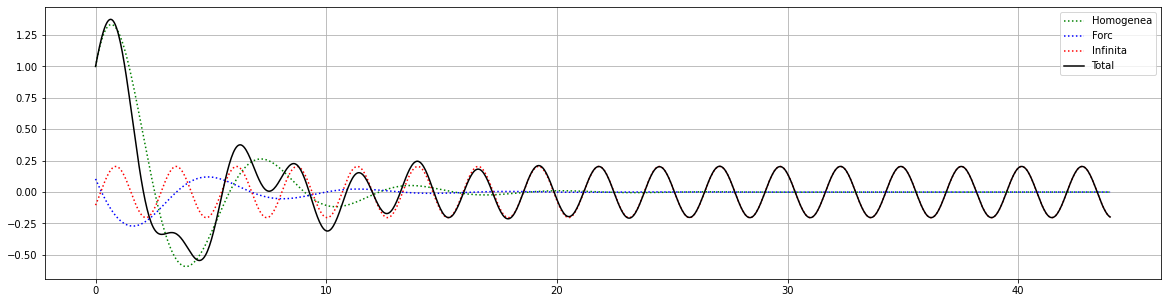

In [6]:
Ttotal = 7*(2*np.pi/wn)
tana = np.linspace(0, Ttotal, 1024+1)
xhomo = np.real(solution_homogenea(m, c, k, x0, v0, tana))
xforc = np.real(solution_forcada(m, c, k, f0, w, phi, tana))
xinfi = np.real(solution_infinita(m, c, k, f0, w, phi, tana))
xtota = np.real(solution_total(m, c, k, x0, v0, f0, w, phi, tana))

plt.figure(figsize=(20, 5))
plt.plot(tana, xhomo, color="g", ls="dotted", label="Homogenea")
plt.plot(tana, xforc, color="b", ls="dotted", label="Forc")
plt.plot(tana, xinfi, color="r", ls="dotted", label="Infinita")
plt.plot(tana, xtota, color="k", label="Total")
plt.legend()
plt.grid()

## Solução Numérica

#### Método 1

In [7]:
MAT = np.array([[0, 1],
              [-k/m, -c/m]])
VEC = np.zeros(2)
def dydt(y, t):
    VEC[1] = f0*np.cos(w*t + phi)
    return MAT @ y + VEC
npts = 10250
t = np.linspace(0, Ttotal, npts)
y0 = [x0, v0]
Y_num1 = odeint(dydt, y0, t)

#### Método 2

In [8]:
lams, P = np.linalg.eig(MAT)
print("Auto valores: ")
for i, lam in enumerate(lams):
    print("lambda%d = %s" % (i, str(lam)))
print("Auto vetores:")
for i in range(len(lams)):
    vi = P[:, i]
    print("v%d = %s" % (i, vi))
Pinv = np.linalg.inv(P)
Y_num2 = np.zeros((npts, 2))
for i in range(npts):
    Matrix = P @ np.diag(np.exp(t[i] * lams)) @ Pinv
    Y_num2[i] = np.real(Matrix) @ y0 

Auto valores: 
lambda0 = (-0.24999999999999997+0.9682458365518543j)
lambda1 = (-0.24999999999999997-0.9682458365518543j)
Auto vetores:
v0 = [ 0.70710678+0.j        -0.1767767 +0.6846532j]
v1 = [ 0.70710678-0.j        -0.1767767 -0.6846532j]


#### Método 3

In [9]:
def getM0(m, c, k, dt, alpha, beta, gamma):
    km = k/m
    cm = c/m
    M0 = np.copy(np.eye(2))
    M0[0, 0] -= (1-beta)*km*(dt**2)/2
    M0[0, 1] += (1-alpha)*dt
    M0[0, 1] -= (1-beta)*cm*(dt**2)/2
    M0[1, 0] -= (1-gamma)*km*dt
    M0[1, 1] -= (1-gamma)*cm*dt
    return M0

def getM1(m, c, k, dt, alpha, beta, gamma):
    km = k/m
    cm = c/m
    M1 = np.copy(np.eye(2))
    M1[0, 0] += beta*km*(dt**2)/2
    M1[0, 1] -= alpha*dt 
    M1[0, 1] += beta*cm*(dt**2)/2
    M1[1, 0] += gamma*km*dt
    M1[1, 1] += gamma*cm*dt
    return M1

def getW(m, c, k, dt, alpha = None, beta = None, gamma = None):
    if alpha is None:
        alpha = 0.0
    if beta is None:
        if xi < 0.2:
            beta = 1/6
        elif xi < 0.6:
            beta = (1/28) + (55*xi/84)
        else:
            beta = 3/7
    if gamma is None:
        gamma = 0.5
    M0 = getM0(m, c, k, dt, alpha, beta, gamma)
    M1 = getM1(m, c, k, dt, alpha, beta, gamma)
    return np.linalg.inv(M1) @ M0

In [10]:
dt = t[1]-t[0]
W = getW(m, c, k, dt)
Y_num3 = np.zeros((npts, 2))
Y_num3[0] = [x0, v0]
for i in range(1, npts):
    Y_num3[i] = W @ Y_num3[i-1]

#### Plotar gráficos

Text(0, 0.5, 'Deslocamento $m$')

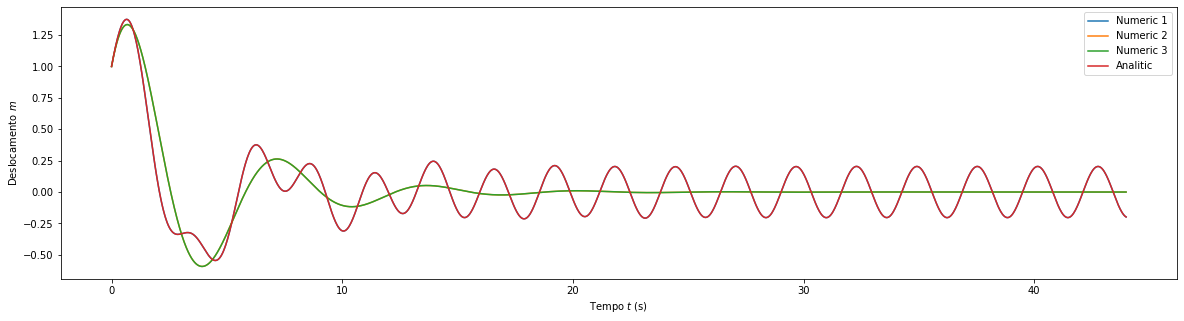

In [11]:
plt.figure(figsize=(20, 5))
plt.plot(t, Y_num1[:, 0], label="Numeric 1")
plt.plot(t, Y_num2[:, 0], label="Numeric 2")
plt.plot(t, Y_num3[:, 0], label="Numeric 3")
plt.plot(tana, xtota, label="Analitic")
plt.legend()
plt.xlabel(r"Tempo $t$ (s)")
plt.ylabel(r"Deslocamento $m$")

## Gráficos para diferentes frequências

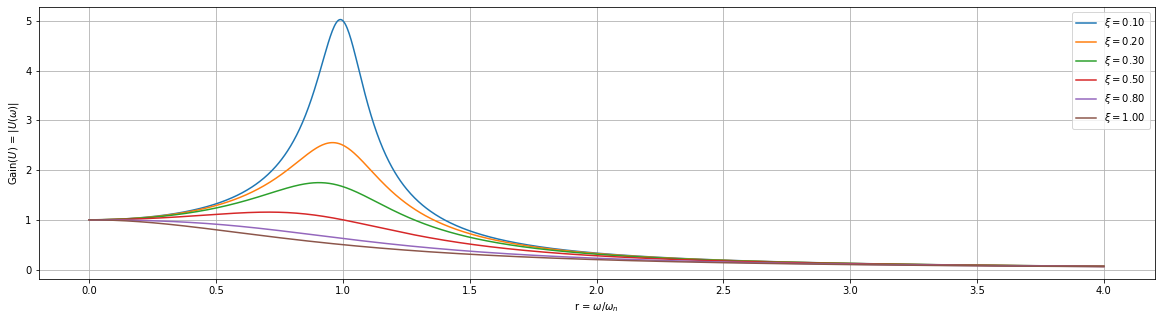

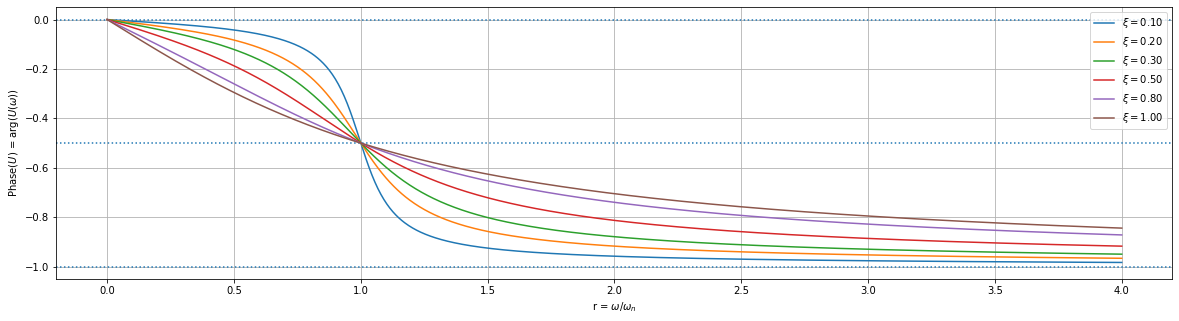

In [12]:
def computeH(xi, r):
    H = (1-r**2) + 1j * (2*xi*r)
    return H
r = np.linspace(0, 4, 1024)
xis = [0.1, 0.2, 0.3, 0.5, 0.8, 1]

plt.figure(figsize=(20, 5))
plt.xlabel(r"r = $\omega/\omega_{n}$")
plt.ylabel(r"Gain($U$) = $\|U(\omega)\|$")
for xi in xis:
    H = computeH(xi, r)
    U = f0/H
    gainU = np.abs(U)
    plt.plot(r*wn, gainU, label=r"$\xi=%.2f$"%xi)
plt.legend()
plt.grid()

plt.figure(figsize=(20, 5))
plt.axhline(0, ls="dotted")
plt.axhline(-0.5, ls="dotted")
plt.axhline(-1, ls="dotted")
plt.xlabel(r"r = $\omega/\omega_{n}$")
plt.ylabel(r"Phase($U$) = arg$\left(U(\omega)\right)$")
for xi in xis:
    H = computeH(xi, r)
    U = f0/H
    phaseU = np.angle(U)
    plt.plot(r, phaseU/np.pi, label=r"$\xi=%.2f$"%xi)
plt.legend()
plt.grid()

## Disponível online

Esse python notebook está disponível online no GitHub através do link:

* [GitHub/carlos-adir/UnB-Courses/vibracoes/forcamento-harmonico](https://github.com/carlos-adir/UnB-Courses/blob/main/vibracoes/forcamento-harmonico.ipynb)